### 线性回归任务的复现 y =2x + 1



In [2]:
import numpy as np
x_value = [i for i in range(11)]
x_train = np.array(x_value, dtype = np.float32)
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [4]:
y_value = [2 * i + 1 for i in x_value]
y_train = np.array(y_value, dtype = np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [5]:
import torch
import torch.nn as nn

### 线性回归模型
* 其实线性回归模型就是一个全连接层

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [13]:
model

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### 指定好参数和损失函数

In [14]:
epochs = 1000
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.MSELoss()

### 训练模型

In [15]:
for epoch in range(epochs):
    epoch += 1
    # 转换为 tensor
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    # 梯度清零
    optimizer.zero_grad()
    # 前向传播
    outputs = model(inputs)
    # 计算损失
    loss = criterion(outputs, labels)
    
    # 反向传播
    loss.backward()
    # 更新权重参数
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch{}, loss{}'.format(epoch, loss.item()))

epoch50, loss0.11385955661535263
epoch100, loss0.06494120508432388
epoch150, loss0.037039998918771744
epoch200, loss0.02112622745335102
epoch250, loss0.012049619108438492
epoch300, loss0.006872622761875391
epoch350, loss0.0039199297316372395
epoch400, loss0.0022357702255249023
epoch450, loss0.00127522146794945
epoch500, loss0.0007273294031620026
epoch550, loss0.00041484145913273096
epoch600, loss0.00023661168233957142
epoch650, loss0.00013494979066308588
epoch700, loss7.696973625570536e-05
epoch750, loss4.3905238271690905e-05
epoch800, loss2.5041599656105973e-05
epoch850, loss1.4281982657848857e-05
epoch900, loss8.147126209223643e-06
epoch950, loss4.646578872780083e-06
epoch1000, loss2.6495415568206226e-06


### 测试模型预测结果

In [18]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.9969717],
       [ 2.997408 ],
       [ 4.9978437],
       [ 6.99828  ],
       [ 8.998716 ],
       [10.999152 ],
       [12.999589 ],
       [15.000025 ],
       [17.00046  ],
       [19.000896 ],
       [21.001331 ]], dtype=float32)

In [28]:
data = predicted.reshape(-1,)

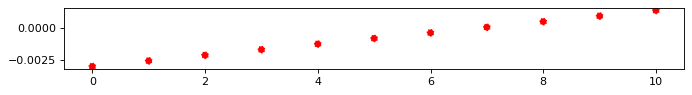

In [50]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,1), dpi = 80)
x = [i for i in range(11)]
# plt.plot(x, data ,label = "predicted", color = "orange",linestyle= ':')
# plt.plot(x, y_value,color = "blue", linestyle= "--")
plt.scatter(x, data - y_value, color = "red", linestyle = ':')
plt.show()